In [2]:

import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libaries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libary to split the data
from sklearn.model_selection import train_test_split

# Libraries to help with visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get different metric scores
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                             confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,
                             precision_recall_curve, roc_curve)


## Loading data

In [3]:
who = pd.read_csv("who_data.csv")

In [4]:
data = who.copy()

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [6]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


In [7]:
data.shape

(32531, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


 * Dependent variable is salary and is an object

In [9]:
data.duplicated().sum()

0

 * There are no duplicate records

In [10]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_contienent         0
salary                    0
dtype: int64

 * There are no missing values

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588362,13.637644,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education_no_of_years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital_gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital_loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

In [12]:
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    # Creating 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2, #Number of rows of the subplot grid = 2
        sharex = True, # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25,0.75)},
        figsize = figsize
        )
    
    # Create the boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    
    # Create the histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.hisplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    
    

In [13]:
# Create function to build labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature]) # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2, 6))
    else:
        plt.figure(figsize=(n+2, 6))
    
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n])
    
    for p in ax.patches:
        if perc == True:
            # percentage of each class of the category
            label = "{:.2f}%".format(100 * p.get_height()/total)
        else:
            # count of each level of the category
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2 # Get width of the plot
        y = p.get_height() # Get height of the plot
        
        # annotate the percentage
        ax.annotate(
            label,
            (x,y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,5),
            textcoords="offset points",)
        

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False)
    print(tab1)
    print("-"*120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False)
    
    tab.plot(kind="bar", stacked=True, figsize=(count+5,5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [15]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12,10))
    
    target_uniq = data[target].unique()
    
    axs[0,0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target]==target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0,0],
        color="teal",
        stat="density")
    
    axs[0,1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target]== target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0,1],
        color="orange",
        stat="density")
    
    axs[1,0].set_title("Boxplot w.r.t. target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1,0], palette="gist_rainbow")
    
    axs[1,1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1,1],
        showfliers=False,
        palette="gist_rainbow")
    
    plt.tight_layout()
    plt.show()
        

In [16]:
df = data.copy()

In [17]:
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


### Univariate Analysis

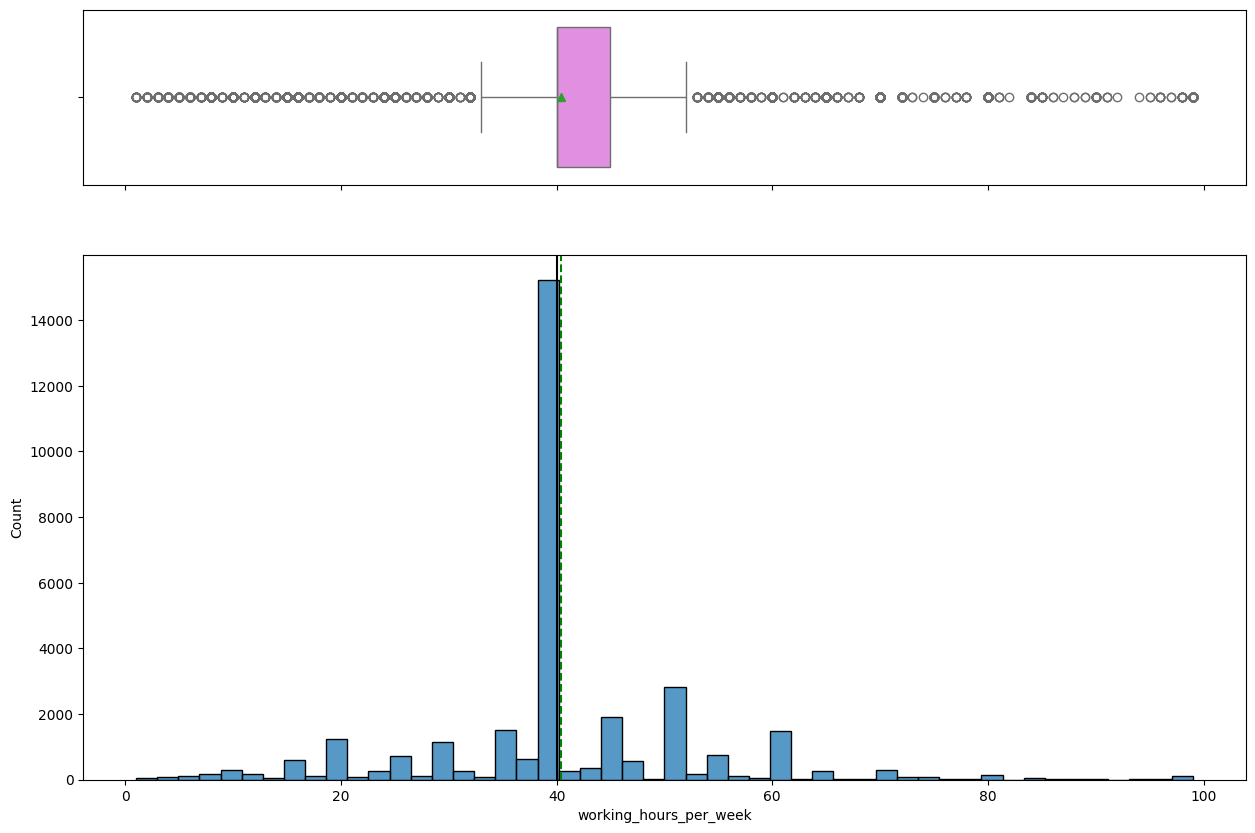

In [18]:
histogram_boxplot(df, "working_hours_per_week", bins=50)

In [19]:
df["workclass"].value_counts().index[:]

Index(['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object')

In [20]:
df["workclass"].value_counts()

Private             22667
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

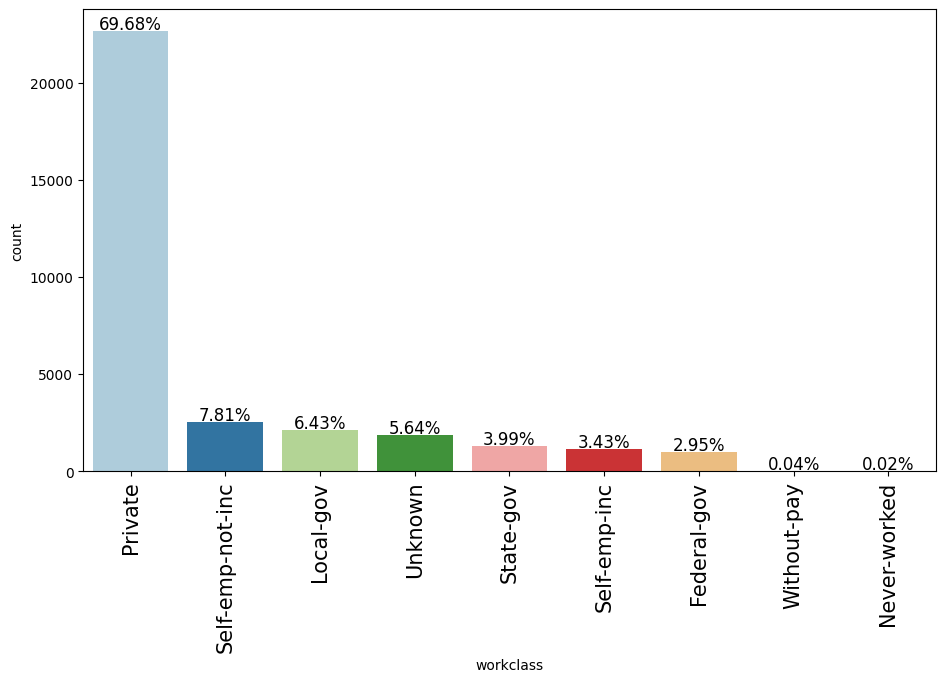

In [21]:
labeled_barplot(df,"workclass", perc=True)

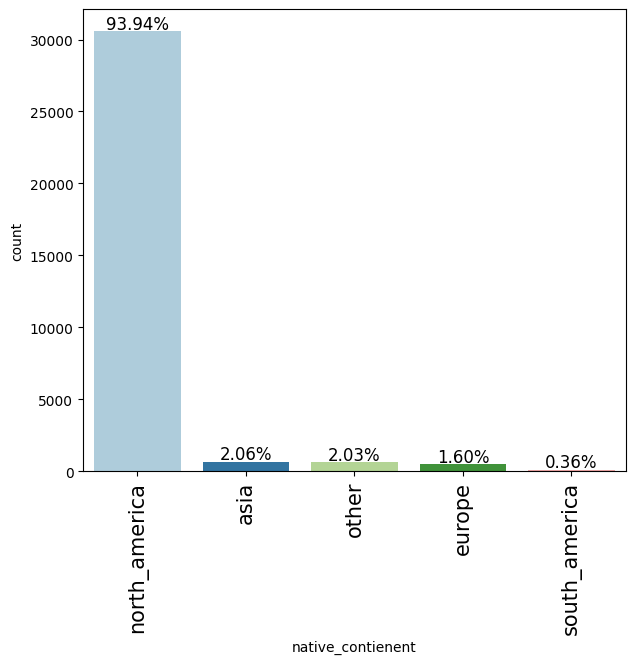

In [22]:
labeled_barplot(df, "native_contienent", perc=True)

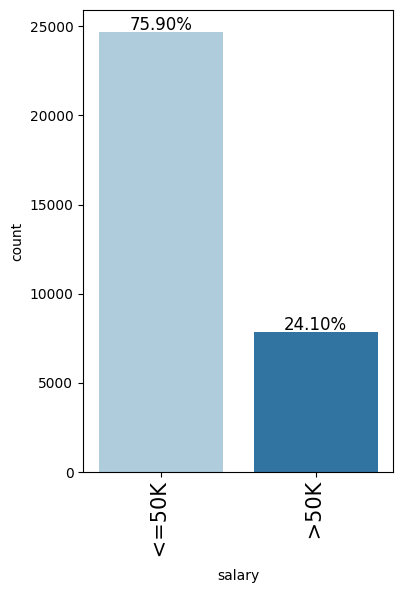

In [23]:
labeled_barplot(df, "salary", perc=True)

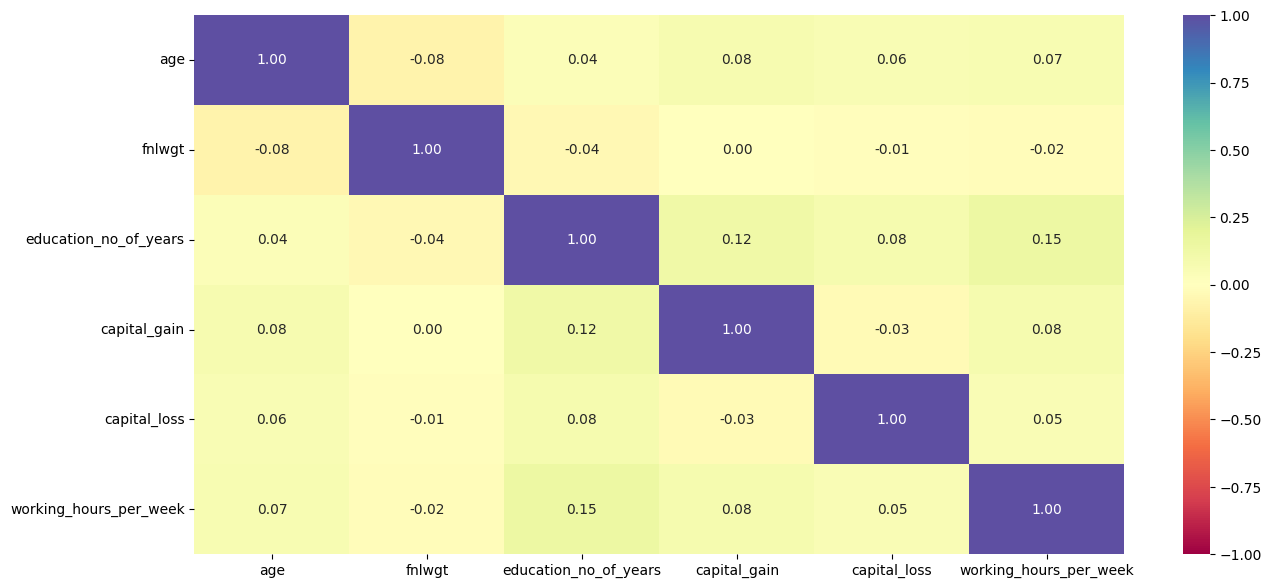

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

salary   <=50K   >50K    All
sex                         
All      24692   7839  32531
Male     15113   6660  21773
Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


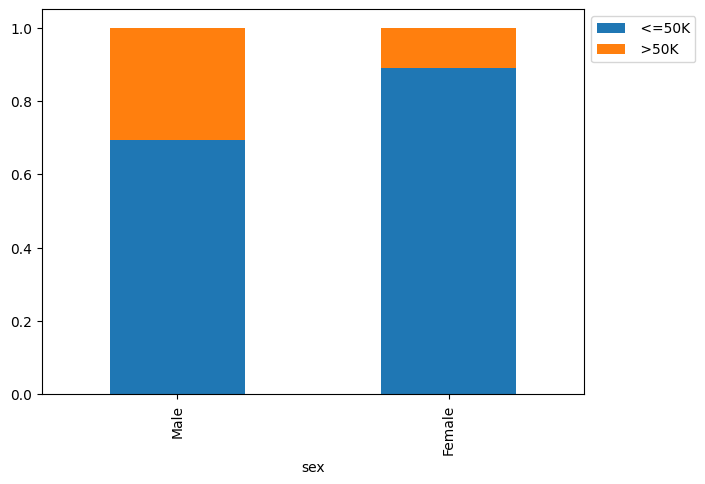

In [25]:
stacked_barplot(df, "sex", "salary")

salary         <=50K   >50K    All
education                         
All            24692   7839  32531
Bachelors       3132   2221   5353
HS-grad         8816   1674  10490
Some-college    5894   1386   7280
Masters          763    959   1722
Prof-school      153    423    576
Assoc-voc       1021    361   1382
Doctorate        107    306    413
Assoc-acdm       802    265   1067
10th             871     62    933
11th            1115     60   1175
7th-8th          605     40    645
12th             400     33    433
9th              487     27    514
5th-6th          316     16    332
1st-4th          160      6    166
Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


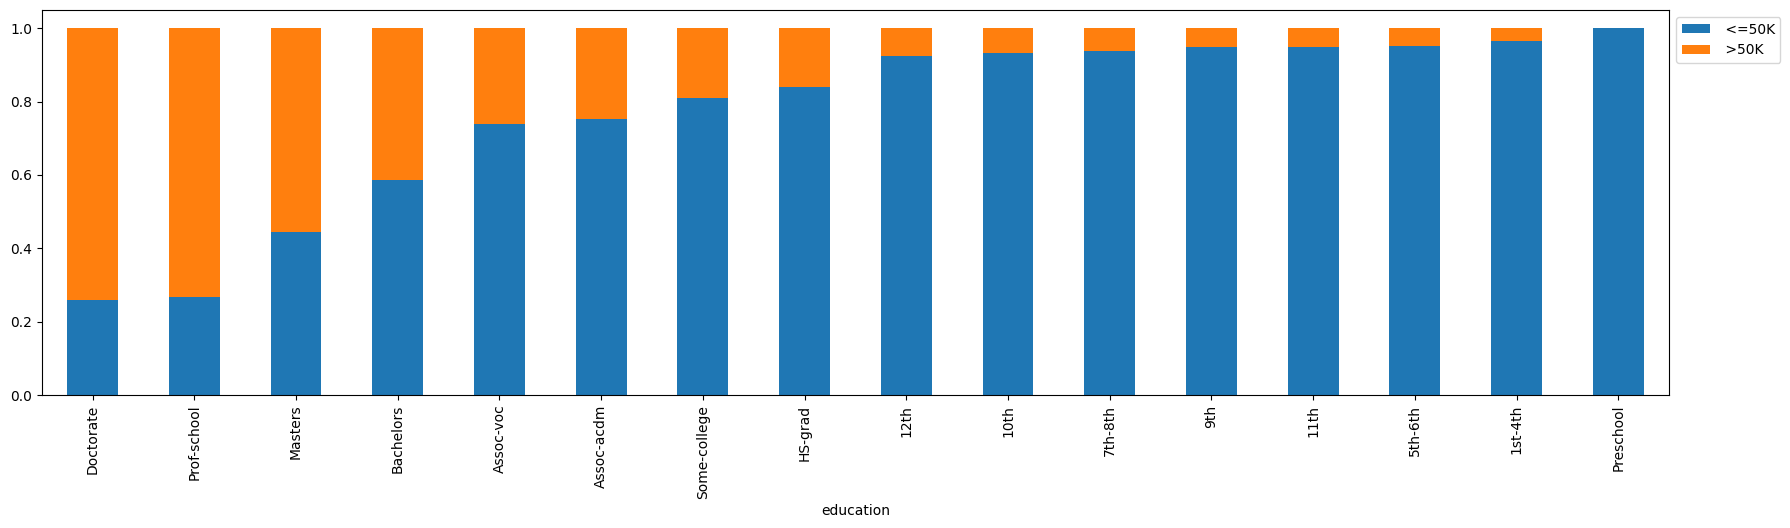

In [26]:
stacked_barplot(df, "education", "salary")

 * ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
 * This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

salary              <=50K   >50K    All
occupation                             
All                 24692   7839  32531
Exec-managerial      2097   1968   4065
Prof-specialty       2278   1858   4136
Sales                2666    983   3649
Craft-repair         3164    929   4093
Adm-clerical         3259    507   3766
Transport-moving     1277    320   1597
Tech-support          644    283    927
Machine-op-inspct    1750    249   1999
Protective-serv       438    211    649
Unknown              1652    191   1843
Other-service        3153    137   3290
Farming-fishing       877    115    992
Handlers-cleaners    1283     86   1369
Armed-Forces            8      1      9
Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


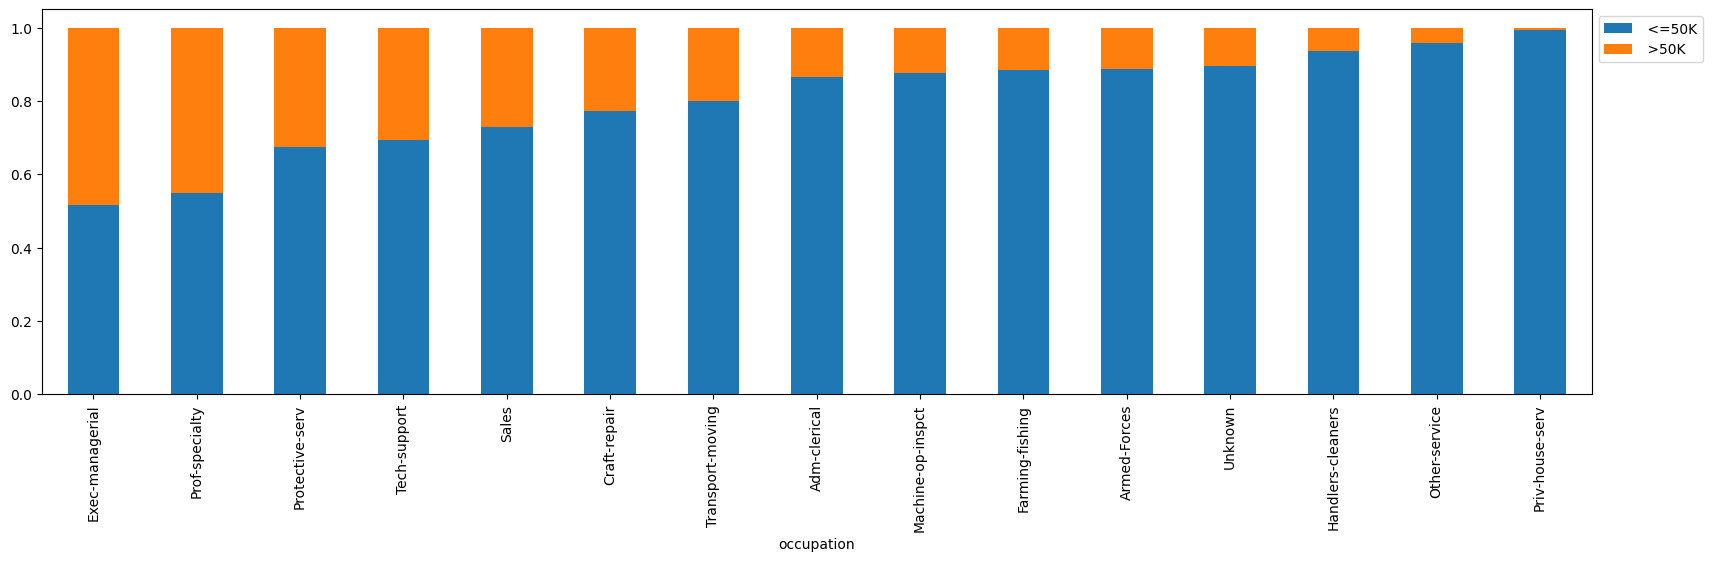

In [27]:
stacked_barplot(df, "occupation", "salary")

salary             <=50K   >50K    All
workclass                             
All                24692   7839  32531
Private            17706   4961  22667
Self-emp-not-inc    1816    724   2540
Self-emp-inc         494    622   1116
Local-gov           1476    617   2093
Federal-gov          589    371    960
State-gov            945    353   1298
Unknown             1645    191   1836
Never-worked           7      0      7
Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


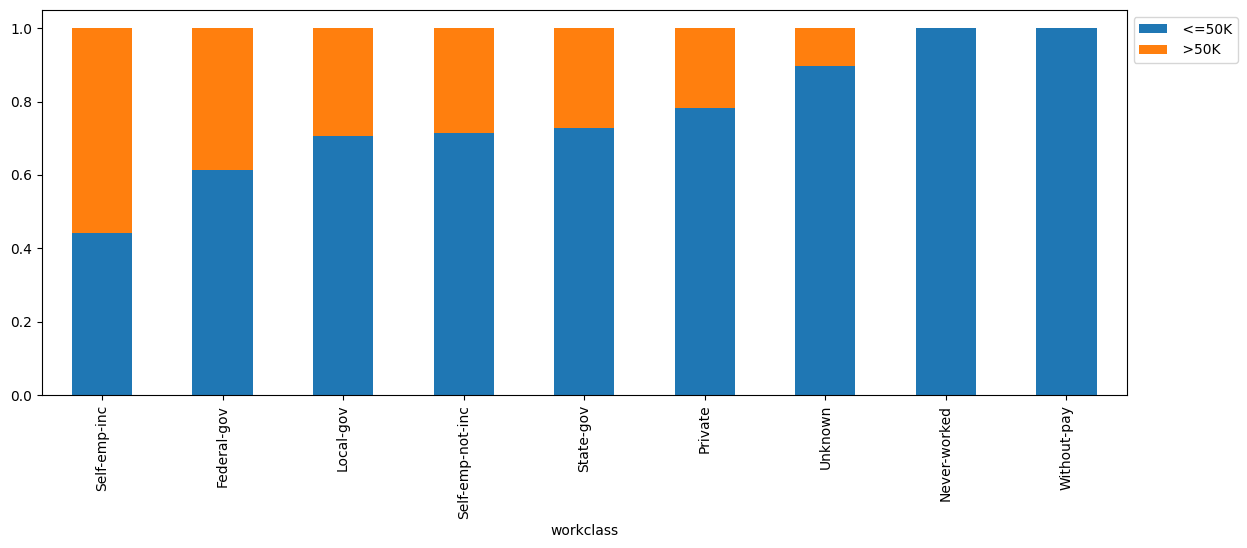

In [28]:
stacked_barplot(df, "workclass", "salary")

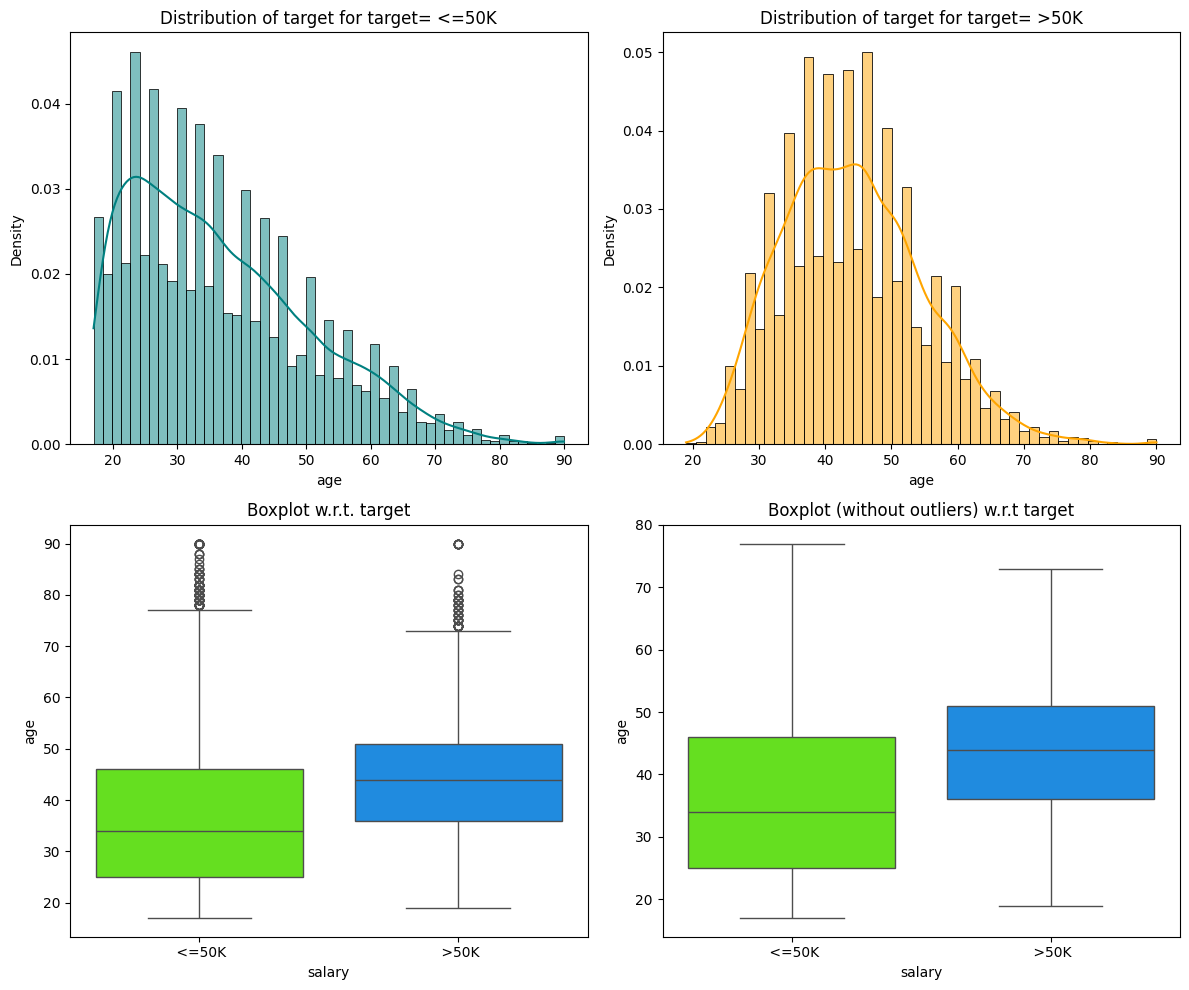

In [29]:
distribution_plot_wrt_target(df, "age", "salary")

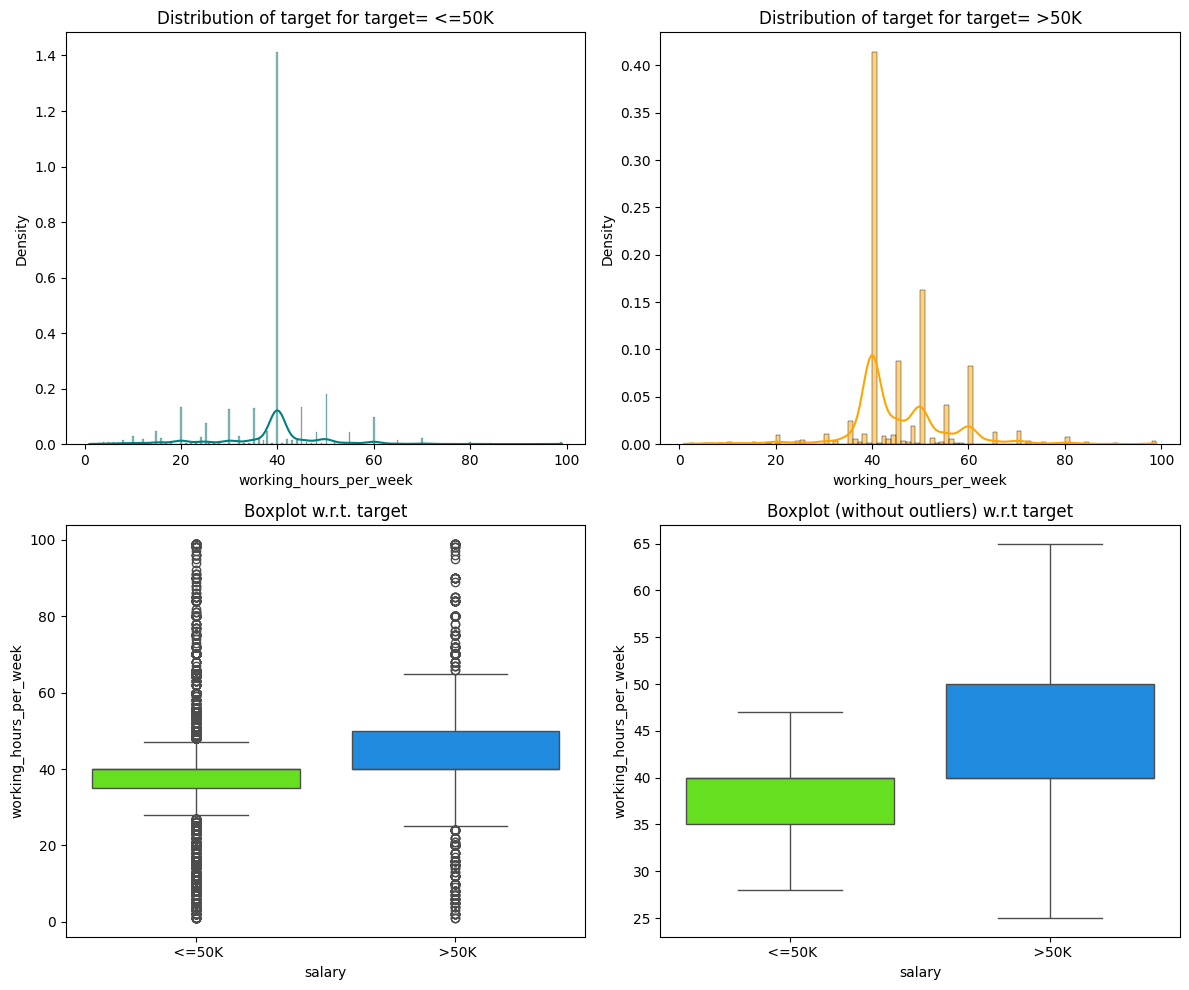

In [30]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

<Axes: xlabel='working_hours_per_week', ylabel='workclass'>

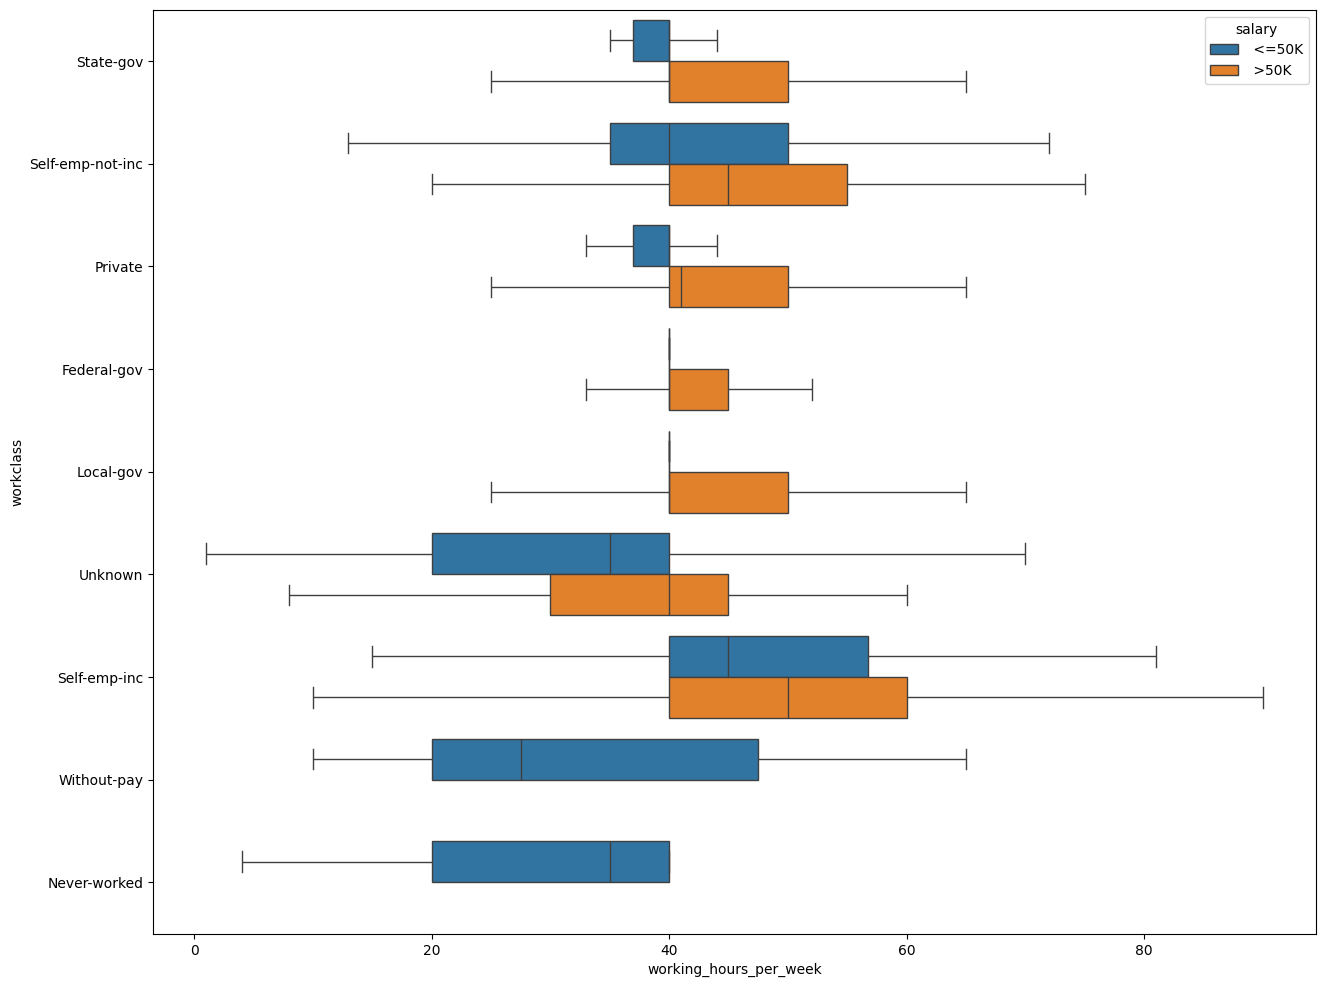

In [31]:
# Boxplot of 2 attributes, one of which is numerical
plt.figure(figsize=(15,12))
sns.boxplot(y="workclass", 
            x="working_hours_per_week", 
            data=df, 
            hue="salary", 
            showfliers=False)

## Data Preprocessing

In [32]:
data["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [33]:
data.drop(["capital_gain","capital_loss"],axis=1, inplace=True)

### Outlier Detection

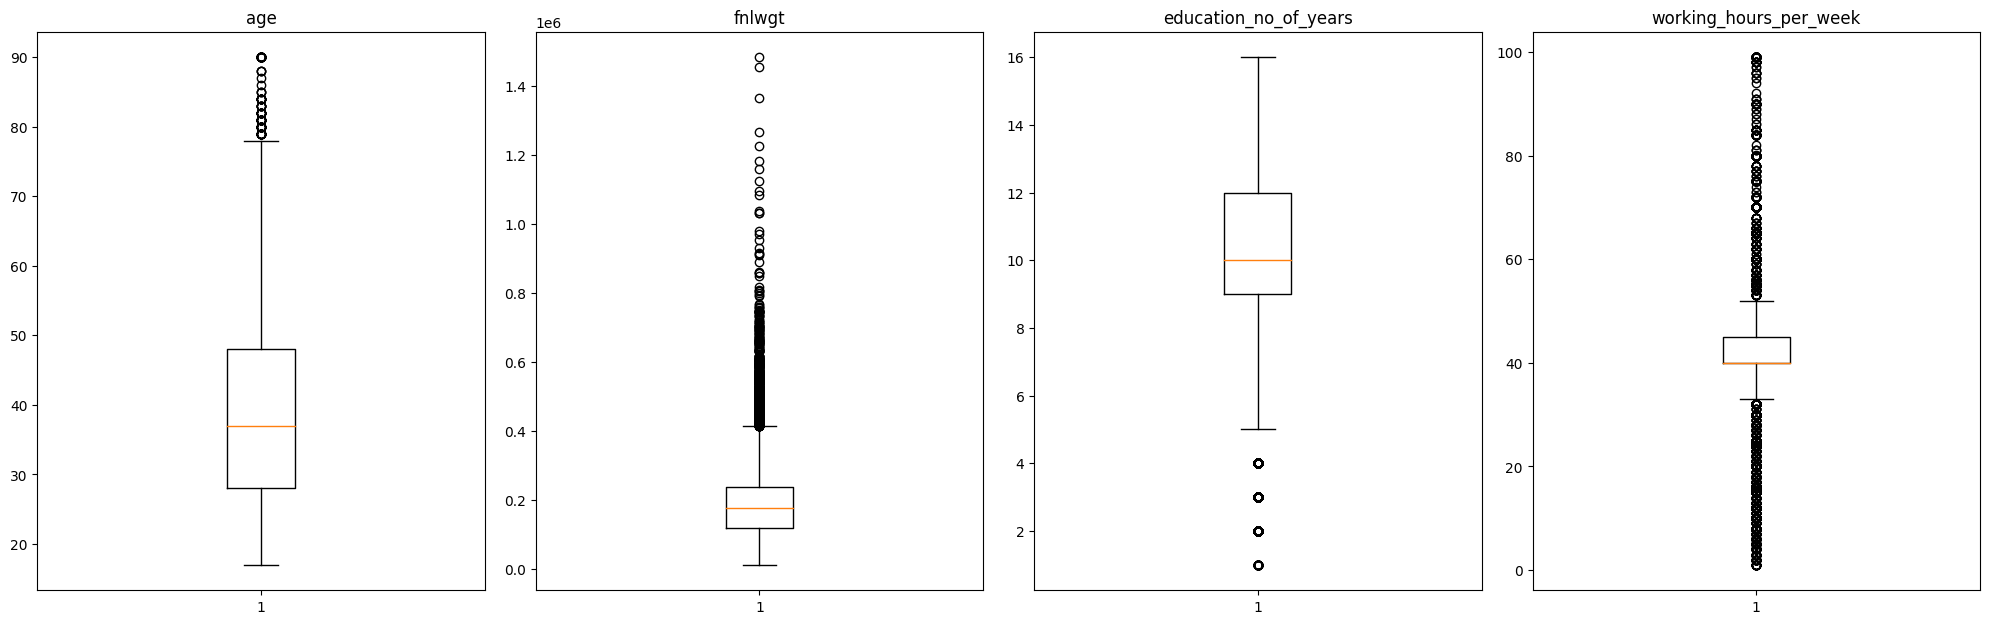

In [34]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5,4,i+1)
    #whis parameter default is 1.5 so not needed here
    plt.boxplot(data[variable], whis=1.5) 
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers.
* education_no_years has lower outliers.
* working_hours_per_week has both upper and lower outliers.

### Outlier Treatment

In [35]:
# Create function to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    
    # All values smaller than the lower whisker will be assigned the value of Lower_Whisker
    # All values greater than the Upper whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    
    return df

def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    
    for c in col_list:
        df = treat_outliers(df, c)
    
    return df

In [36]:
numerical_col = data.select_dtypes(include=np.number).columns.to_list()
data = treat_outliers_all(data, numerical_col)

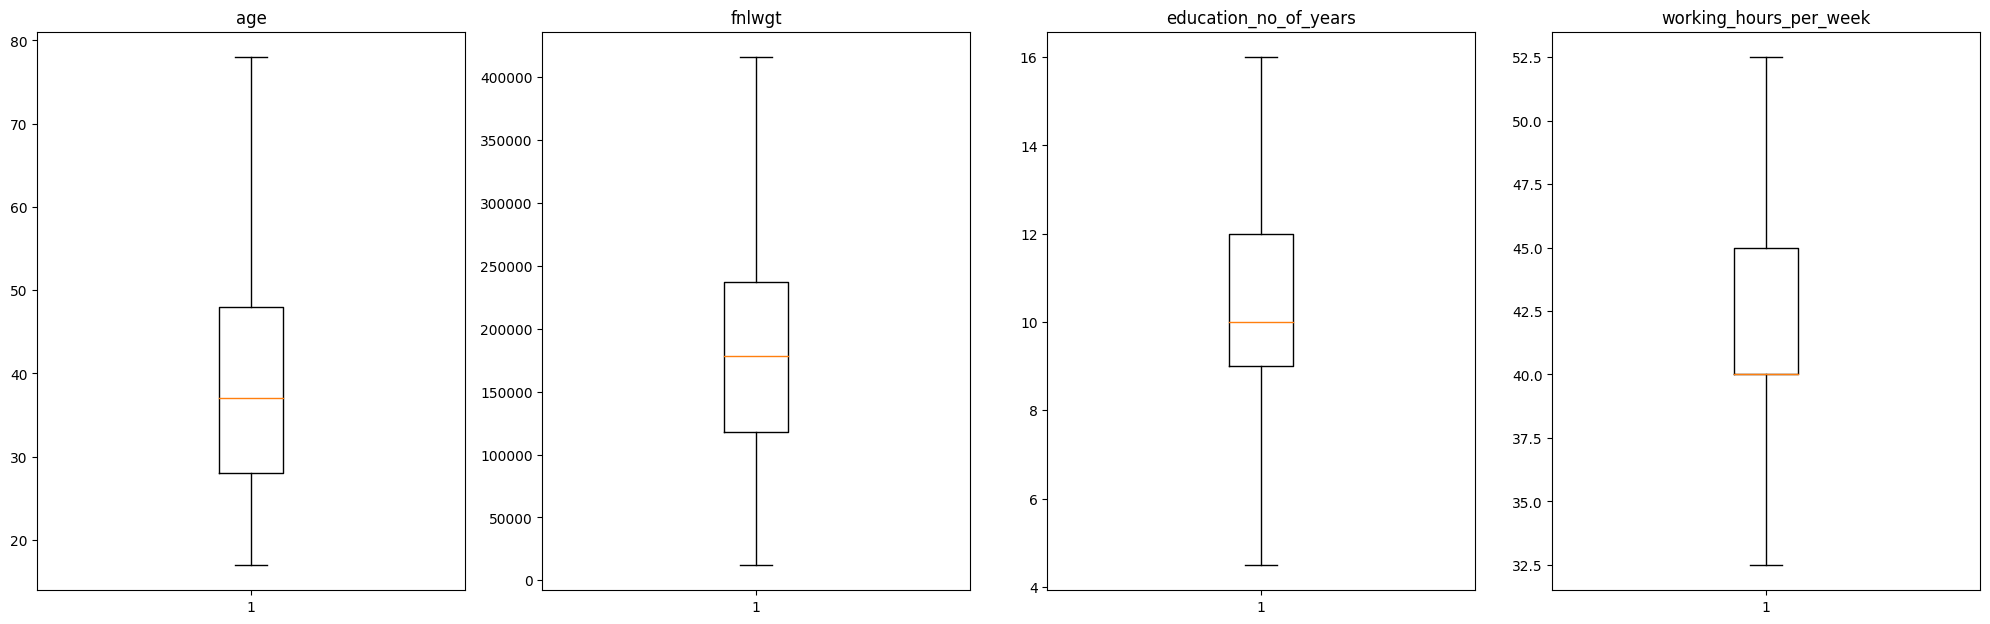

In [37]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [38]:
data["salary"] = data["salary"].apply(lambda x: 1 if x== " <=50K" else 0)

In [39]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,White,Male,40.0,north_america,1
1,50,Self-emp-not-inc,83311,Bachelors,13.0,married,Exec-managerial,White,Male,32.5,north_america,1
2,38,Private,215646,HS-grad,9.0,not_married,Handlers-cleaners,White,Male,40.0,north_america,1
3,53,Private,234721,11th,7.0,married,Handlers-cleaners,Black,Male,40.0,north_america,1
4,28,Private,338409,Bachelors,13.0,married,Prof-specialty,Black,Female,40.0,north_america,1


In [40]:
data.nunique()

age                          62
workclass                     9
fnlwgt                    20811
education                    16
education_no_of_years        13
marital_status                3
occupation                   15
race                          5
sex                           2
working_hours_per_week       22
native_contienent             5
salary                        2
dtype: int64

**Creating training and test sets.**

In [41]:
# specifying the independent  and dependent variables
X = data.drop(["salary"], axis=1)
y = data["salary"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first = True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22771, 53)
Shape of test set :  (9760, 53)
Percentage of classes in training set:
1    0.758026
0    0.241974
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.761373
0    0.238627
Name: salary, dtype: float64


## Model Building - Logistic Regression

In [43]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.3678
Time:                        11:26:25   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.5200   7.02e+05   1.36e-05      1.000   -1.38e+06    1.38e+06
age                                -0.0314      0.002    -17.126    

In [44]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5):
    
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    
    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)
    
    # To compute accuracy
    acc = accuracy_score(target, pred)
    # To compute recall
    recall = recall_score(target, pred)
    # To compute precision
    precision = precision_score(target, pred)
    # To compute the F-1 score
    f1 = f1_score(target, pred)
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0])
    
    return df_perf

In [45]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())]
            for item in cm.flatten()
        ]
        ).reshape(2,2)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    

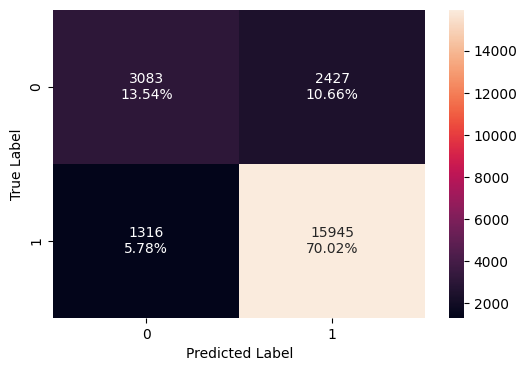

In [46]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [47]:
print("Training performance")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


In [48]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float)

print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked                   inf
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                        inf
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [49]:
X_train1 = X_train.drop("occupation_Unknown", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index = X_train1.columns)

print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked              1.012785
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                   3.039325
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [50]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                              326.271888
age                                  1.531401
fnlwgt                               1.037491
working_hours_per_week               1.237162
workclass_Local-gov                  3.041470
workclass_Never-worked               1.012785
workclass_Private                    7.717533
workclass_Self-emp-inc               2.217152
workclass_Self-emp-not-inc           3.487046
workclass_State-gov                  2.317984
workclass_Unknown                    3.039325
workclass_Without-pay                1.015562
education_11th                       2.147415
education_12th                       1.422410
education_1st-4th                    1.188352
education_5th-6th                    1.338683
education_7th-8th                    1.655272
education_9th                        1.524978
education_Assoc-acdm                 2.105382
education_Assoc-voc                  2.374490
education_Bachelors                  5.939193

In [51]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


In [57]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.3678
Time:                        11:57:40   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.3433      0.405     20.584      0.000       7.549       9.138
age                                -0.0314      0.002    -17.126    

In [55]:
lg2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                   Method:                  MLE       
Dependent Variable:          salary                  Pseudo R-squared:        0.368     
Date:                        2025-01-05 11:56        AIC:                     16033.5300
No. Observations:            22771                   BIC:                     16443.2254
Df Model:                    50                      Log-Likelihood:          -7965.8   
Df Residuals:                22720                   LL-Null:                 -12600.   
Converged:                   0.0000                  LLR p-value:             0.0000    
No. Iterations:              35.0000                 Scale:                   1.0000    
----------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z     P>|z|     [0.025     0.975]  
----------------------------------------------------------------------------------------
const                            8.3433    0.4053  20.5839 0.0000      7.5488     9.1377
age                             -0.0314    0.0018 -17.1265 0.0000     -0.0350    -0.0278
fnlwgt                          -0.0000    0.0000  -2.8809 0.0040     -0.0000    -0.0000
working_hours_per_week          -0.0655    0.0035 -18.6860 0.0000     -0.0724    -0.0586
workclass_Local-gov              0.7669    0.1265   6.0615 0.0000      0.5189     1.0148
workclass_Never-worked          16.5407 5517.8572   0.0030 0.9976 -10798.2607 10831.3421
workclass_Private                0.5196    0.1045   4.9718 0.0000      0.3148     0.7244
workclass_Self-emp-inc           0.2891    0.1374   2.1048 0.0353      0.0199     0.5583
workclass_Self-emp-not-inc       0.9751    0.1235   7.8986 0.0000      0.7332     1.2171
workclass_State-gov              0.9400    0.1410   6.6670 0.0000      0.6636     1.2163
workclass_Unknown                1.2653    0.1559   8.1180 0.0000      0.9598     1.5709
workclass_Without-pay           16.5958 1640.0047   0.0101 0.9919  -3197.7543  3230.9459
education_11th                  -0.0294    0.2387  -0.1233 0.9018     -0.4972     0.4384
education_12th                  -0.3966    0.2933  -1.3520 0.1764     -0.9715     0.1783
education_1st-4th                1.6066    0.7417   2.1662 0.0303      0.1530     3.0603
education_5th-6th                0.5044    0.3642   1.3849 0.1661     -0.2095     1.2183
education_7th-8th                0.6165    0.2651   2.3253 0.0201      0.0969     1.1362
education_9th                    0.6077    0.3096   1.9631 0.0496      0.0010     1.2144
education_Assoc-acdm            -1.2664    0.1986  -6.3756 0.0000     -1.6558    -0.8771
education_Assoc-voc             -1.3471    0.1900  -7.0883 0.0000     -1.7196    -0.9746
education_Bachelors             -1.9643    0.1764 -11.1331 0.0000     -2.3102    -1.6185
education_Doctorate             -2.9061    0.2382 -12.1997 0.0000     -3.3730    -2.4393
education_HS-grad               -0.7659    0.1716  -4.4635 0.0000     -1.1022    -0.4296
education_Masters               -2.3671    0.1881 -12.5829 0.0000     -2.7358    -1.9984
education_Preschool             16.5732 2562.4952   0.0065 0.9948  -5005.8251  5038.9714
education_Prof-school           -3.1219    0.2236 -13.9612 0.0000     -3.5601    -2.6836
education_Some-college          -1.0517    0.1743  -6.0351 0.0000     -1.3932    -0.7101
marital_status_married          -2.5742    0.0695 -37.0595 0.0000     -2.7104    -2.4381
marital_status_not_married      -0.4045    0.0842  -4.8060 0.0000     -0.5695    -0.2395
occupation_Armed-Forces          0.5322    1.5293   0.3480 0.7278     -2.4652     3.5296
occupation_Craft-repair          0.0011    0.0885   0.0130 0.9896     -0.1722     0.1745
occupation_Exec-managerial      -0.6952    0.0848  -8.1991 0.0000     -0

In [61]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #defining the train set
    X_train_aux = X_train2[cols]
    
    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)
    
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_1st-4th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'race_Other', 'race_White', 'native_contienent_other', 'native_contienent_south_america']


In [62]:
X_train3 = X_train2[selected_features]

In [64]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22735
Method:                           MLE   Df Model:                           35
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.3666
Time:                        12:39:00   Log-Likelihood:                -7980.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.0557      0.233     34.544      0.000       7.599       8.513
age                                -0.0314      0.002    -17.178    

In [65]:
print(lg3.params)

const                              8.055719e+00
age                               -3.135629e-02
fnlwgt                            -6.273044e-07
working_hours_per_week            -6.495883e-02
workclass_Local-gov                6.101025e-01
workclass_Private                  3.584826e-01
workclass_Self-emp-not-inc         8.012002e-01
workclass_State-gov                7.793399e-01
workclass_Unknown                  1.088053e+00
education_1st-4th                  1.598944e+00
education_7th-8th                  6.163542e-01
education_9th                      5.930986e-01
education_Assoc-acdm              -1.281761e+00
education_Assoc-voc               -1.367063e+00
education_Bachelors               -1.984754e+00
education_Doctorate               -2.908678e+00
education_HS-grad                 -7.808070e-01
education_Masters                 -2.380628e+00
education_Prof-school             -3.138774e+00
education_Some-college            -1.073855e+00
marital_status_married            -2.579

In [67]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params)-1)*100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds":odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,age,fnlwgt,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_married,marital_status_not_married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,race_Other,race_White,native_contienent_other,native_contienent_south_america
Odds,3151.769230,0.969130,0.999999,0.937106,1.840620,1.431156,2.228214,2.180033,2.968489,4.947805,1.852163,1.809587,0.277548,0.254854,0.137414,0.054548,0.458036,0.092492,0.043336,0.341689,0.075834,0.674683,0.489944,2.887110,2.215304,1.468939,2.656708,11.291126,0.620316,0.577698,0.855304,0.532832,1.976960,0.856834,1.573320,3.524735
Change_odd%,315076.922967,-3.086978,-0.000063,-6.289395,84.062005,43.115618,122.821364,118.003275,196.848948,394.780514,85.216306,80.958691,-72.245187,-74.514571,-86.258563,-94.545220,-54.196379,-90.750752,-95.666411,-65.831123,-92.416624,-32.531684,-51.005637,188.710981,121.530367,46.893899,165.670835,1029.112563,-37.968373,-42.230185,-14.469579,-46.716755,97.696049,-14.316591,57.332018,252.473541


**Coefficient interpretations**

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by ~0.97 times or a ~3% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by ~0.94 times or a decrease of ~6.3% decrease in odds of having salary <=50K.
* `marital_status`: The odds of a person whose marital status is married having a salary <=50K is ~0.076 less than the person who was never married or ~92.4% fewer odds of having salary <=50K than the person who was never married. Similarly, the odds of a person whose marital status is not_married having a salary <=50K is ~0.67 times less than the person who was never married or ~32.5% less odds of having a salary <=50K than the person who was never married. [the dropped category Never_married is taken as a reference level]
* `education`: The odds of a person who is HS-grad having salary <=50K is ~0.45 times less than the person who has done education 1st-9th, 11th or Preschool or ~54.1% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.05 times less than the person who has done education 1st-9th or Preschool or ~95.00% less odds of having a salary <=50K. [the dropped categories education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool are taken as a reference level]

**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

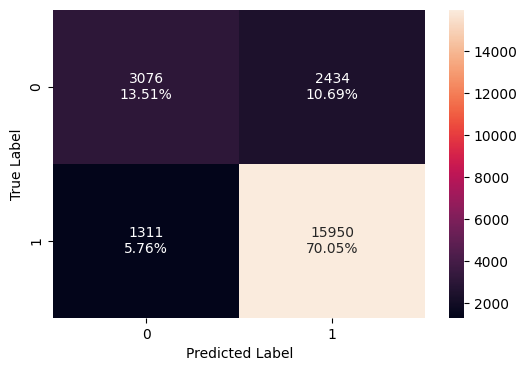

In [69]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [70]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg3, X_train3, y_train)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835536,0.924048,0.867602,0.894936


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [71]:
X_test3 = X_test[list(X_train3.columns)]

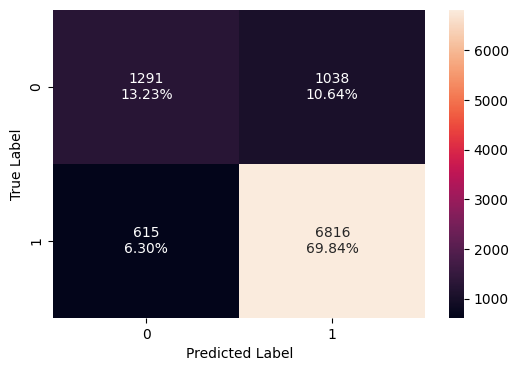

In [72]:
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [73]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.830635,0.917239,0.867838,0.891855


- The model is giving a good f1_score of ~0.895 and ~0.892 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

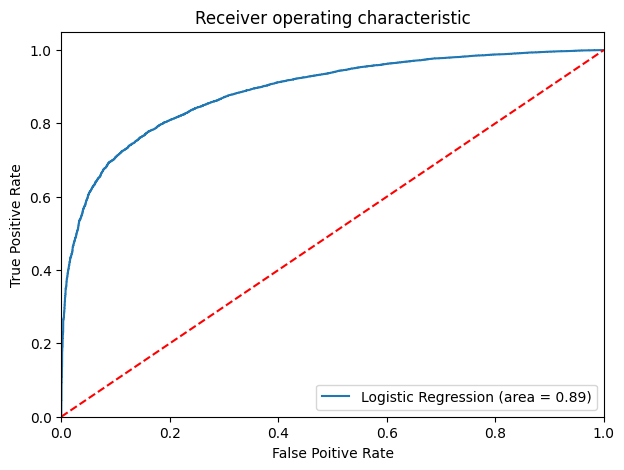

In [76]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Poitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [79]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

# fpr = false positive rate of prediction
# tpr = true positive rate of prediction
fpr, tpr, threshold = roc_curve(y_train, lg3.predict(X_train3))

# finds the id where the maximum value of tpr-fpr occurs

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)


0.757939940733009


In [80]:
np.argmax(tpr-fpr)

1548

In [81]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99909256, 0.99909256,
       1.        ])

**Checking model performance on training set**

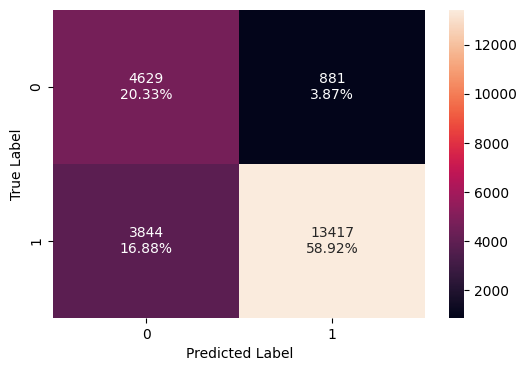

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [83]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792499,0.777301,0.938383,0.85028


**Checking model performance on test set**

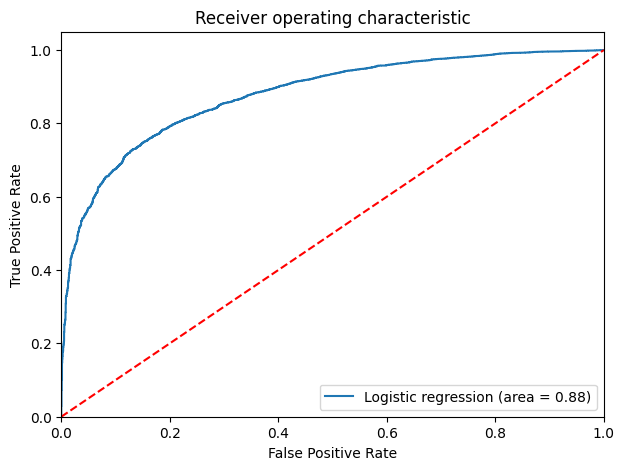

In [87]:
logic_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic regression (area = %0.2f)" % logic_roc_auc_train)
plt.plot([0,1],[0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

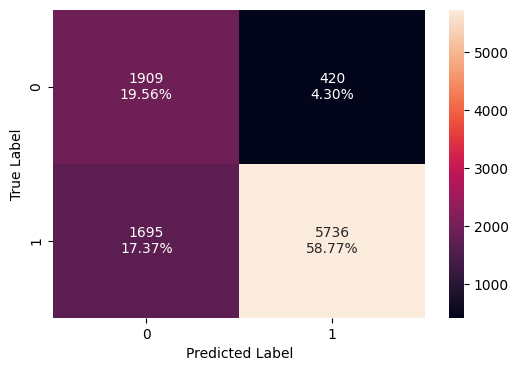

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [89]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.783299,0.771901,0.931774,0.844336


### Precision-Recall Curve

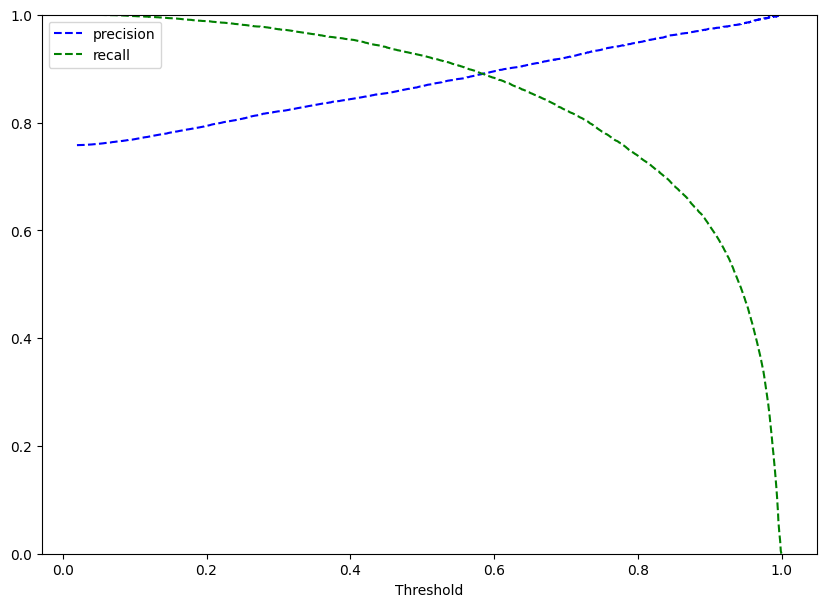

In [96]:
prec, rec, tre = precision_recall_curve(y_train, lg3.predict(X_train3))
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plt.figure(figsize=(10,7))
plot_prec_recall_vs_thresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [93]:
# setting the threshold
optimal_threshold_curve = 0.58

**Checking model performance on training set**

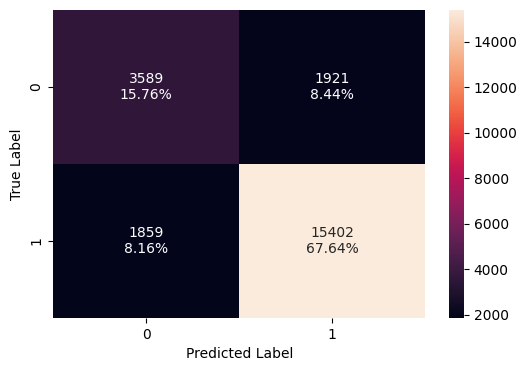

In [97]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [98]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.833999,0.892301,0.889107,0.890701


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

**Checking model performance on the test set**

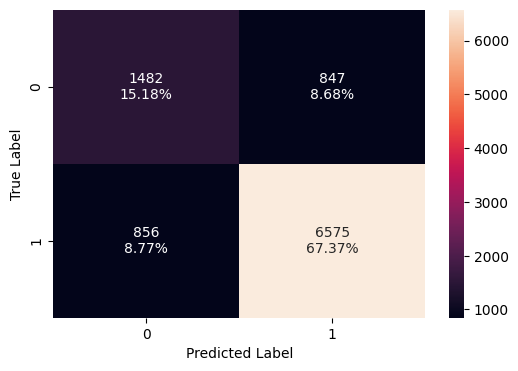

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [100]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825512,0.884807,0.88588,0.885343


## Model Performance Comparison and Final Model Selection

In [103]:
# training performance comparison

model_train_comp_df = pd.concat(
    [log_reg_model_train_perf.T,
     log_reg_model_train_perf_threshold_auc_roc.T,
     log_reg_model_train_perf_threshold_curve.T],
    axis=1)

model_train_comp_df.columns = [
        "Logistic Regression: Default Threshold (0.5)",
        "Logistic Regression: 0.76 Threshold",
        "Logistic Regression: 0.58 Threshold"]

print("Training performance comparison:")
model_train_comp_df

Training performance comparison:


,Logistic Regression: Default Threshold (0.5),Logistic Regression: 0.76 Threshold,Logistic Regression: 0.58 Threshold
Accuracy,0.835536,0.792499,0.833999
Recall,0.924048,0.777301,0.892301
Precision,0.867602,0.938383,0.889107
F1,0.894936,0.850280,0.890701


In [104]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.830635,0.783299,0.825512
Recall,0.917239,0.771901,0.884807
Precision,0.867838,0.931774,0.885880
F1,0.891855,0.844336,0.885343


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.5) is giving the best F1 score. Therefore it can be selected as the final model